In [1]:
from unsupervised.unsupervised.SVD import SVD
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

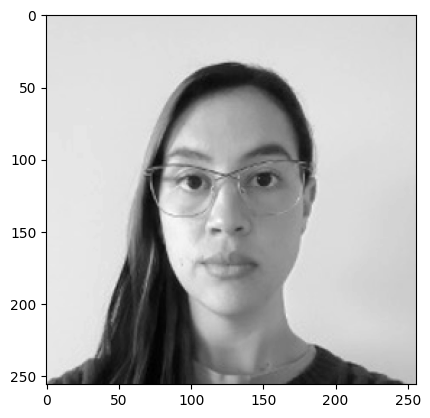

In [2]:
# Open the image
my_image = Image.open("Imagen23.jpg")
# Convert to grayscale
my_image = my_image.convert("L")
my_image = my_image.resize((256, 256))

# Plot the image
plt.imshow(my_image, cmap="gray")
plt.show()

In [3]:
my_image_array = np.array(my_image)

In [4]:
my_image_array.shape

(256, 256)

In [9]:
def get_new_face_image(n_singular_values):
    svd = SVD(n_singular_values=n_singular_values)
    comps = svd.fit_transform(my_image_array)
    plt.imshow(comps, cmap="gray")
    plt.show()

    diference_face = comps.flatten() - my_image_array.flatten()
    diference_face_image = diference_face.reshape((256, 256)).astype(np.uint8)
    # Plot the image
    diference_face_image_scalated = diference_face_image/(max(diference_face)-min(diference_face))
    plt.imshow(diference_face_image_scalated,cmap = 'coolwarm',vmin=0,vmax=1)
    plt.colorbar()
    plt.show()
    plt.hist([comps.flatten(),my_image_array.flatten()])

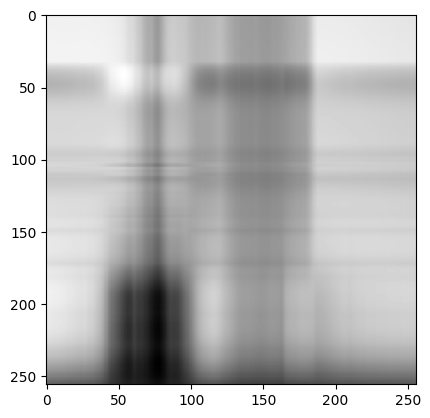

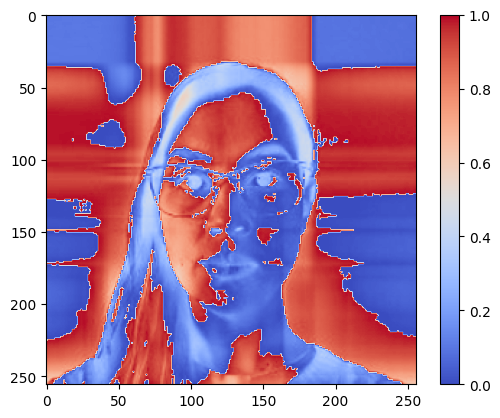

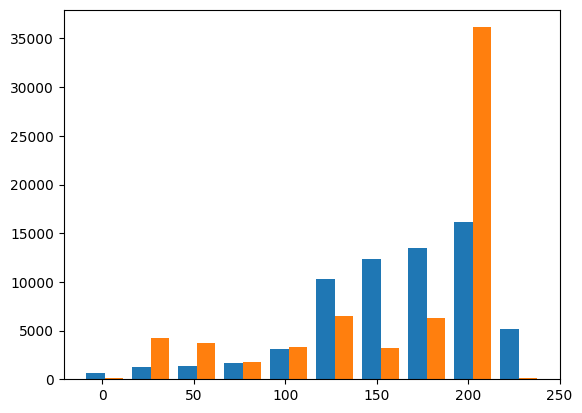

In [10]:
get_new_face_image(2)

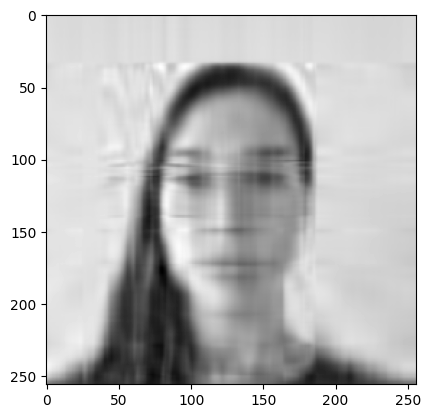

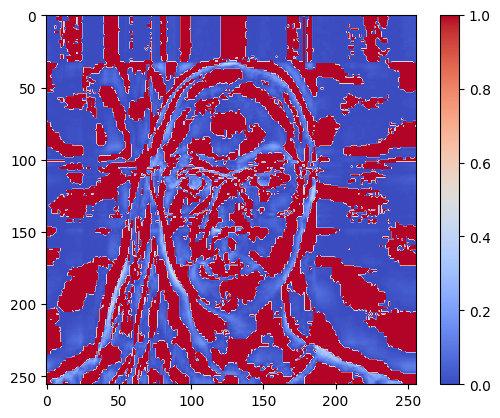

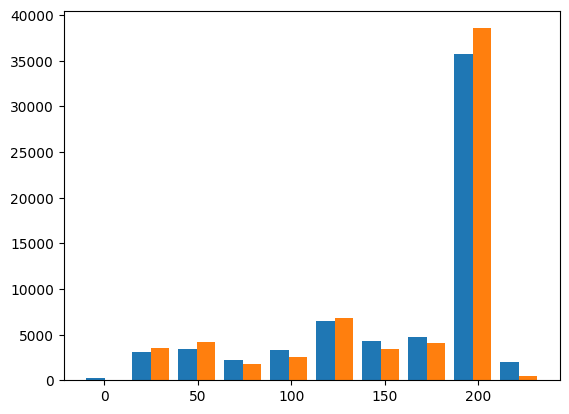

In [11]:
get_new_face_image(10)

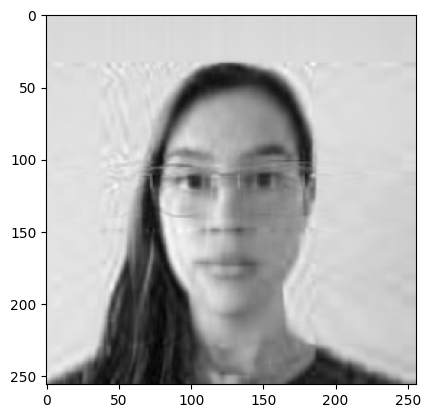

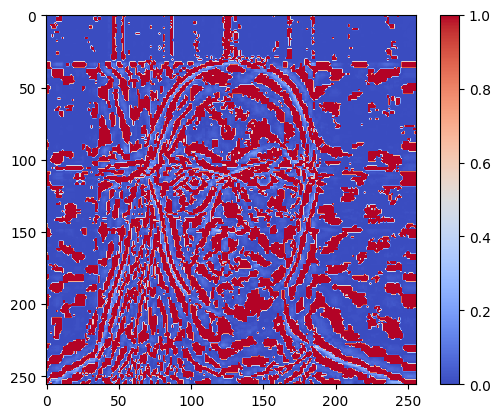

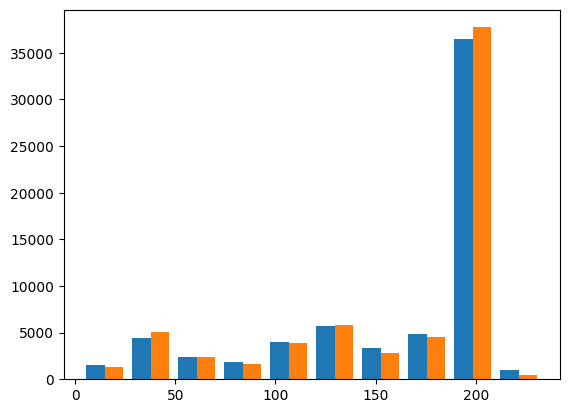

In [12]:
get_new_face_image(20)

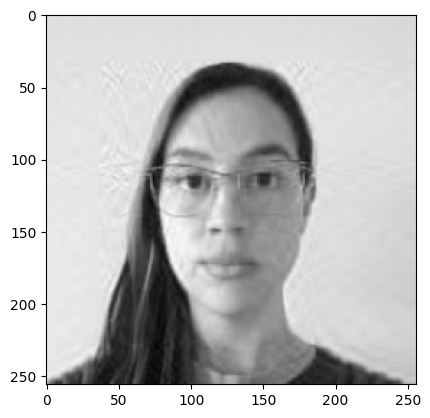

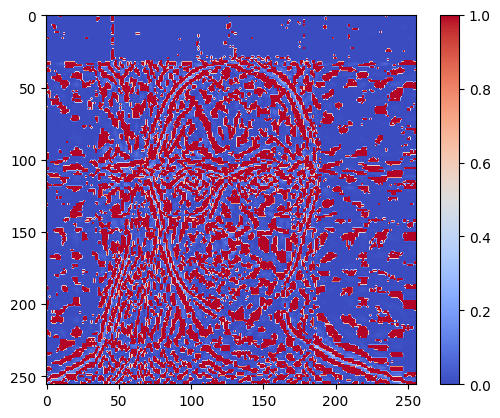

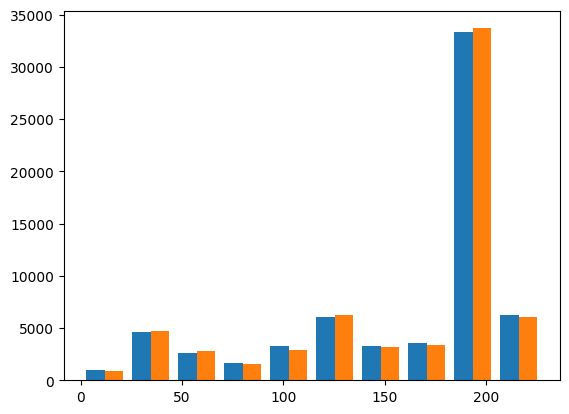

In [13]:
get_new_face_image(30)